#Etapa 1: Importações

In [1]:
# Bibliotecas processamento
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

#Divisao do conjunto em treinamento e teste
from sklearn.model_selection import train_test_split

#Modelos de aprendizado
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Validacao cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import metrics


#Biblioteca seaborn
import seaborn as sns

#Etapa 2: Entender Base de Dados 

Informações dos atributos:

Atributo 1: (qualitativo) - Status da conta corrente existente
--

A11: ... < 0 DM 

A12 : 0 <= ... < 200 DM

A13 : ... >= 200 DM / atribuições salariais por pelo menos 1 ano 

A14: sem conta corrente 
___________________________________________________________________

Atributo 2: (numérico)- Duração no mês
--
___________________________________________________________________
Atributo 3: (qualitativo) - Histórico de crédito
--

A30 : nenhum crédito recebido/todos os créditos pagos devidamente 

A31 : todos os créditos neste banco foram devidamente pagos 

A32 : créditos existentes pagos devidamente até agora 

A33 : atraso no pagamento no passado 

A34 : conta crítica/ outros créditos existentes (não neste banco) 

___________________________________________________________________

Atributo 4: (qualitativo) - Propósito
--
A40 : carro (novo) 

A41 : carro (usado) 

A42 : móveis/equipamentos 

A43 : rádio/televisão 

A44: eletrodomésticos 

A45 : reparos 

A46: educação 

A47 : (férias - não existe?)

A48: reciclagem 

A49: negócios 

A410: outros 

___________________________________________________________________
Atributo 5: (numérico) - Quantidade de crédito
--
___________________________________________________________________
Atributo 6: (qualitativo) - Conta poupança/títulos
--
A61: ... < 100 DM

A62: 100 <= ... < 500 DM

A63 : 500 <= ... < 1000 DM

A64 : .. >= 1000 DM

A65 : desconhecido/sem conta poupança
___________________________________________________________________

Atributo 7: (qualitativo) - Emprego atual desde
--
A71 : desempregado

A72 : ... < 1 ano

A73 : 1 <= ... < 4 anos

A74 : 4 <= ... < 7 anos

A75 : .. >= 7 anos
___________________________________________________________________

Atributo 8: (numérico) - Taxa de prestação em percentagem do rendimento disponível
--

___________________________________________________________________

Atributo 9: (qualitativo) - Status pessoal e sexo
--
A91 : masculino : divorciado/separado

A92 : mulher : divorciada/separada/casada

A93 : masculino : solteiro

A94 : masculino : casado/viúvo

A95 : feminino : solteiro

___________________________________________________________________

Atributo 10: (qualitativo) - Outros devedores / fiadores
--
A101: nenhum

A102 : co-requerente

A103: fiador

___________________________________________________________________

Atributo 11: (numérico) - Residência atual desde
--
___________________________________________________________________
Atributo 12: (qualitativo) - Propriedade
--
A121: imóveis

A122 : se não A121 : convênio de poupança/seguro de vida

A123 : se não A121/A122 : carro ou outro, não no atributo 6

A124: desconhecido/sem propriedade
___________________________________________________________________

Atributo 13: (numérico) - Idade em anos
--
___________________________________________________________________
Atributo 14: (qualitativo) - Outros planos de parcelamento
--
A141: banco

A142 : lojas

A143: nenhum

___________________________________________________________________

Atributo 15: (qualitativo) - Habitação
--
A151 : aluguel

A152 : próprio

A153: de graça

___________________________________________________________________

Atributo 16: (numérico) - Número de créditos existentes neste banco
--

___________________________________________________________________


Atributo 17: (qualitativo) - Trabalho
--
A171 : desempregado/ não qualificado - não residente

A172 : não qualificado - residente

A173 : funcionário/funcionário qualificado

A174 : gestão/ autônomo/
funcionário/diretor altamente qualificado
___________________________________________________________________

Atributo 18: (numérico) - Número de pessoas responsáveis ​​pela manutenção de
--
___________________________________________________________________
Atributo 19: (qualitativo) - Telefone
--
A191: nenhum

A192 : sim, registrado em nome do cliente

___________________________________________________________________

Atributo 20: (qualitativo) - Trabalhador estrangeiro
--
A201: sim

A202: não
___________________________________________________________________

Rótulo:
--

1: Bom Cliente

2: Mau Cliente

# Etapa 3: Ler Base de Dados

In [2]:
df = pd.read_csv("german.data", delimiter=" ")

# Etapa 4: Exibir informações sobre os dados lidos

In [3]:
df.head(10)
print("Atributos Existentes - Quantidade")
df.count()

Atributos Existentes - Quantidade


StatusContaCorrente              1000
DuraçãoNoMês                     1000
HistóricoDeCrédito               1000
Propósito                        1000
QuantidadeDeCrédito              1000
ContaPoupançaOuTítulos           1000
EmpregoAtualDesde                1000
TaxaDePrestaçãoDoRendimento      1000
StatusPessoalESexo               1000
OutrosDevedoresOuFiadores        1000
ResidênciaAtualDesde             1000
Propriedade                      1000
IdadeEmAnos                      1000
OutrosPlanosDeParcelamento       1000
Habitação                        1000
NúmeroDeCréditos                 1000
Trabalho                         1000
NúmeroDePessoasRespManutenção    1000
Telefone                         1000
TrabalhadorEstrangeiro           1000
BomOuMauCliente                  1000
dtype: int64

#Etapa 5: Preprocessameto dos Dados

# 5.1 Tratar Dados Nulos (Limpeza)

In [4]:
df.info()
df.isnull().sum()

print("\n\nNessa Base de Dados não teve nenhum atributo com dado Nulo !")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   StatusContaCorrente            1000 non-null   object
 1   DuraçãoNoMês                   1000 non-null   int64 
 2   HistóricoDeCrédito             1000 non-null   object
 3   Propósito                      1000 non-null   object
 4   QuantidadeDeCrédito            1000 non-null   int64 
 5   ContaPoupançaOuTítulos         1000 non-null   object
 6   EmpregoAtualDesde              1000 non-null   object
 7   TaxaDePrestaçãoDoRendimento    1000 non-null   int64 
 8   StatusPessoalESexo             1000 non-null   object
 9   OutrosDevedoresOuFiadores      1000 non-null   object
 10  ResidênciaAtualDesde           1000 non-null   int64 
 11  Propriedade                    1000 non-null   object
 12  IdadeEmAnos                    1000 non-null   int64 
 13  Outr

# 5.2 - Tratar Dados Duplicados

In [5]:
df.drop_duplicates(inplace=True)
print("Itens Existentes",df.count()[0])


print("\nNessa Base de Dados não teve dados Duplicados !")

Itens Existentes 1000

Nessa Base de Dados não teve dados Duplicados !


# 5.3 Transformação de atributos nominais em numéricos

In [6]:
df.head()

,StatusContaCorrente,DuraçãoNoMês,HistóricoDeCrédito,Propósito,QuantidadeDeCrédito,ContaPoupançaOuTítulos,EmpregoAtualDesde,TaxaDePrestaçãoDoRendimento,StatusPessoalESexo,OutrosDevedoresOuFiadores,...,Propriedade,IdadeEmAnos,OutrosPlanosDeParcelamento,Habitação,NúmeroDeCréditos,Trabalho,NúmeroDePessoasRespManutenção,Telefone,TrabalhadorEstrangeiro,BomOuMauCliente
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [7]:
#Usar LabelEncoder para isso?

# Converter Atributo StatusContaCorrente para numérico
df["StatusContaCorrente"] = df["StatusContaCorrente"].astype("category")
df["StatusContaCorrente"] = df["StatusContaCorrente"].cat.codes

# Converter Atributo Hitórico de Crédito para numérico
df["HistóricoDeCrédito"] = df["HistóricoDeCrédito"].astype("category")
df["HistóricoDeCrédito"] = df["HistóricoDeCrédito"].cat.codes
# Converter Propósito para numérico
df["Propósito"] = df["Propósito"].astype("category")
df["Propósito"] = df["Propósito"].cat.codes

# Converter Atributo ContaPoupançaOuTítulos para  numérico
df["ContaPoupançaOuTítulos"] = df["ContaPoupançaOuTítulos"].astype("category")
df["ContaPoupançaOuTítulos"] = df["ContaPoupançaOuTítulos"].cat.codes

# Converter Atributo EmpregoAtualDesde  para numérico
df["EmpregoAtualDesde"] = df["EmpregoAtualDesde"].astype("category")
df["EmpregoAtualDesde"] = df["EmpregoAtualDesde"].cat.codes

# Converter Atributo Status Pessoal e Sexo para numérico
df["StatusPessoalESexo"] = df["StatusPessoalESexo"].astype("category")
df["StatusPessoalESexo"] = df["StatusPessoalESexo"].cat.codes

# Converter Atributo OutrosDevedoresOuFiadores para numérico
df["OutrosDevedoresOuFiadores"] = df["OutrosDevedoresOuFiadores"].astype("category")
df["OutrosDevedoresOuFiadores"] = df["OutrosDevedoresOuFiadores"].cat.codes

# Converter Atributo Propriedade para numérico
df["Propriedade"] = df["Propriedade"].astype("category")
df["Propriedade"] = df["Propriedade"].cat.codes

# Converter Atributo OutrosPlanosDeParcelamento para numérico
df["OutrosPlanosDeParcelamento"] = df["OutrosPlanosDeParcelamento"].astype("category")
df["OutrosPlanosDeParcelamento"] = df["OutrosPlanosDeParcelamento"].cat.codes

# Converter Atributo Habitação para numérico
df["Habitação"] = df["Habitação"].astype("category")
df["Habitação"] = df["Habitação"].cat.codes

# Converter Atributo Trabalho para numérico
df["Trabalho"] = df["Trabalho"].astype("category")
df["Trabalho"] = df["Trabalho"].cat.codes

# Converter Atributo Telefone para numérico
df["Telefone"] = df["Telefone"].astype("category")
df["Telefone"] = df["Telefone"].cat.codes

# Converter Atributo TrabalhadorEstrangeiro para numérico
df["TrabalhadorEstrangeiro"] = df["TrabalhadorEstrangeiro"].astype("category")
df["TrabalhadorEstrangeiro"] = df["TrabalhadorEstrangeiro"].cat.codes


df.head()

,StatusContaCorrente,DuraçãoNoMês,HistóricoDeCrédito,Propósito,QuantidadeDeCrédito,ContaPoupançaOuTítulos,EmpregoAtualDesde,TaxaDePrestaçãoDoRendimento,StatusPessoalESexo,OutrosDevedoresOuFiadores,...,Propriedade,IdadeEmAnos,OutrosPlanosDeParcelamento,Habitação,NúmeroDeCréditos,Trabalho,NúmeroDePessoasRespManutenção,Telefone,TrabalhadorEstrangeiro,BomOuMauCliente
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,2
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,1
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,1
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,2


# 5.4 Remover Atributos que não são muito úteis

In [8]:
# Remover
# StatusPessoal e Sexo
# Idade em Anos
# Número de pessoas responsáveis
# Telefone
# TrabalhadorEstrangeiro
df.drop(["StatusPessoalESexo", "IdadeEmAnos", "NúmeroDePessoasRespManutenção", "Telefone", "TrabalhadorEstrangeiro"], axis=1, inplace=True)
df.head()

,StatusContaCorrente,DuraçãoNoMês,HistóricoDeCrédito,Propósito,QuantidadeDeCrédito,ContaPoupançaOuTítulos,EmpregoAtualDesde,TaxaDePrestaçãoDoRendimento,OutrosDevedoresOuFiadores,ResidênciaAtualDesde,Propriedade,OutrosPlanosDeParcelamento,Habitação,NúmeroDeCréditos,Trabalho,BomOuMauCliente
0,0,6,4,4,1169,4,4,4,0,4,0,2,1,2,2,1
1,1,48,2,4,5951,0,2,2,0,2,0,2,1,1,2,2
2,3,12,4,7,2096,0,3,2,0,3,0,2,1,1,1,1
3,0,42,2,3,7882,0,3,2,2,4,1,2,2,1,2,1
4,0,24,3,0,4870,0,2,3,0,4,3,2,2,2,2,2


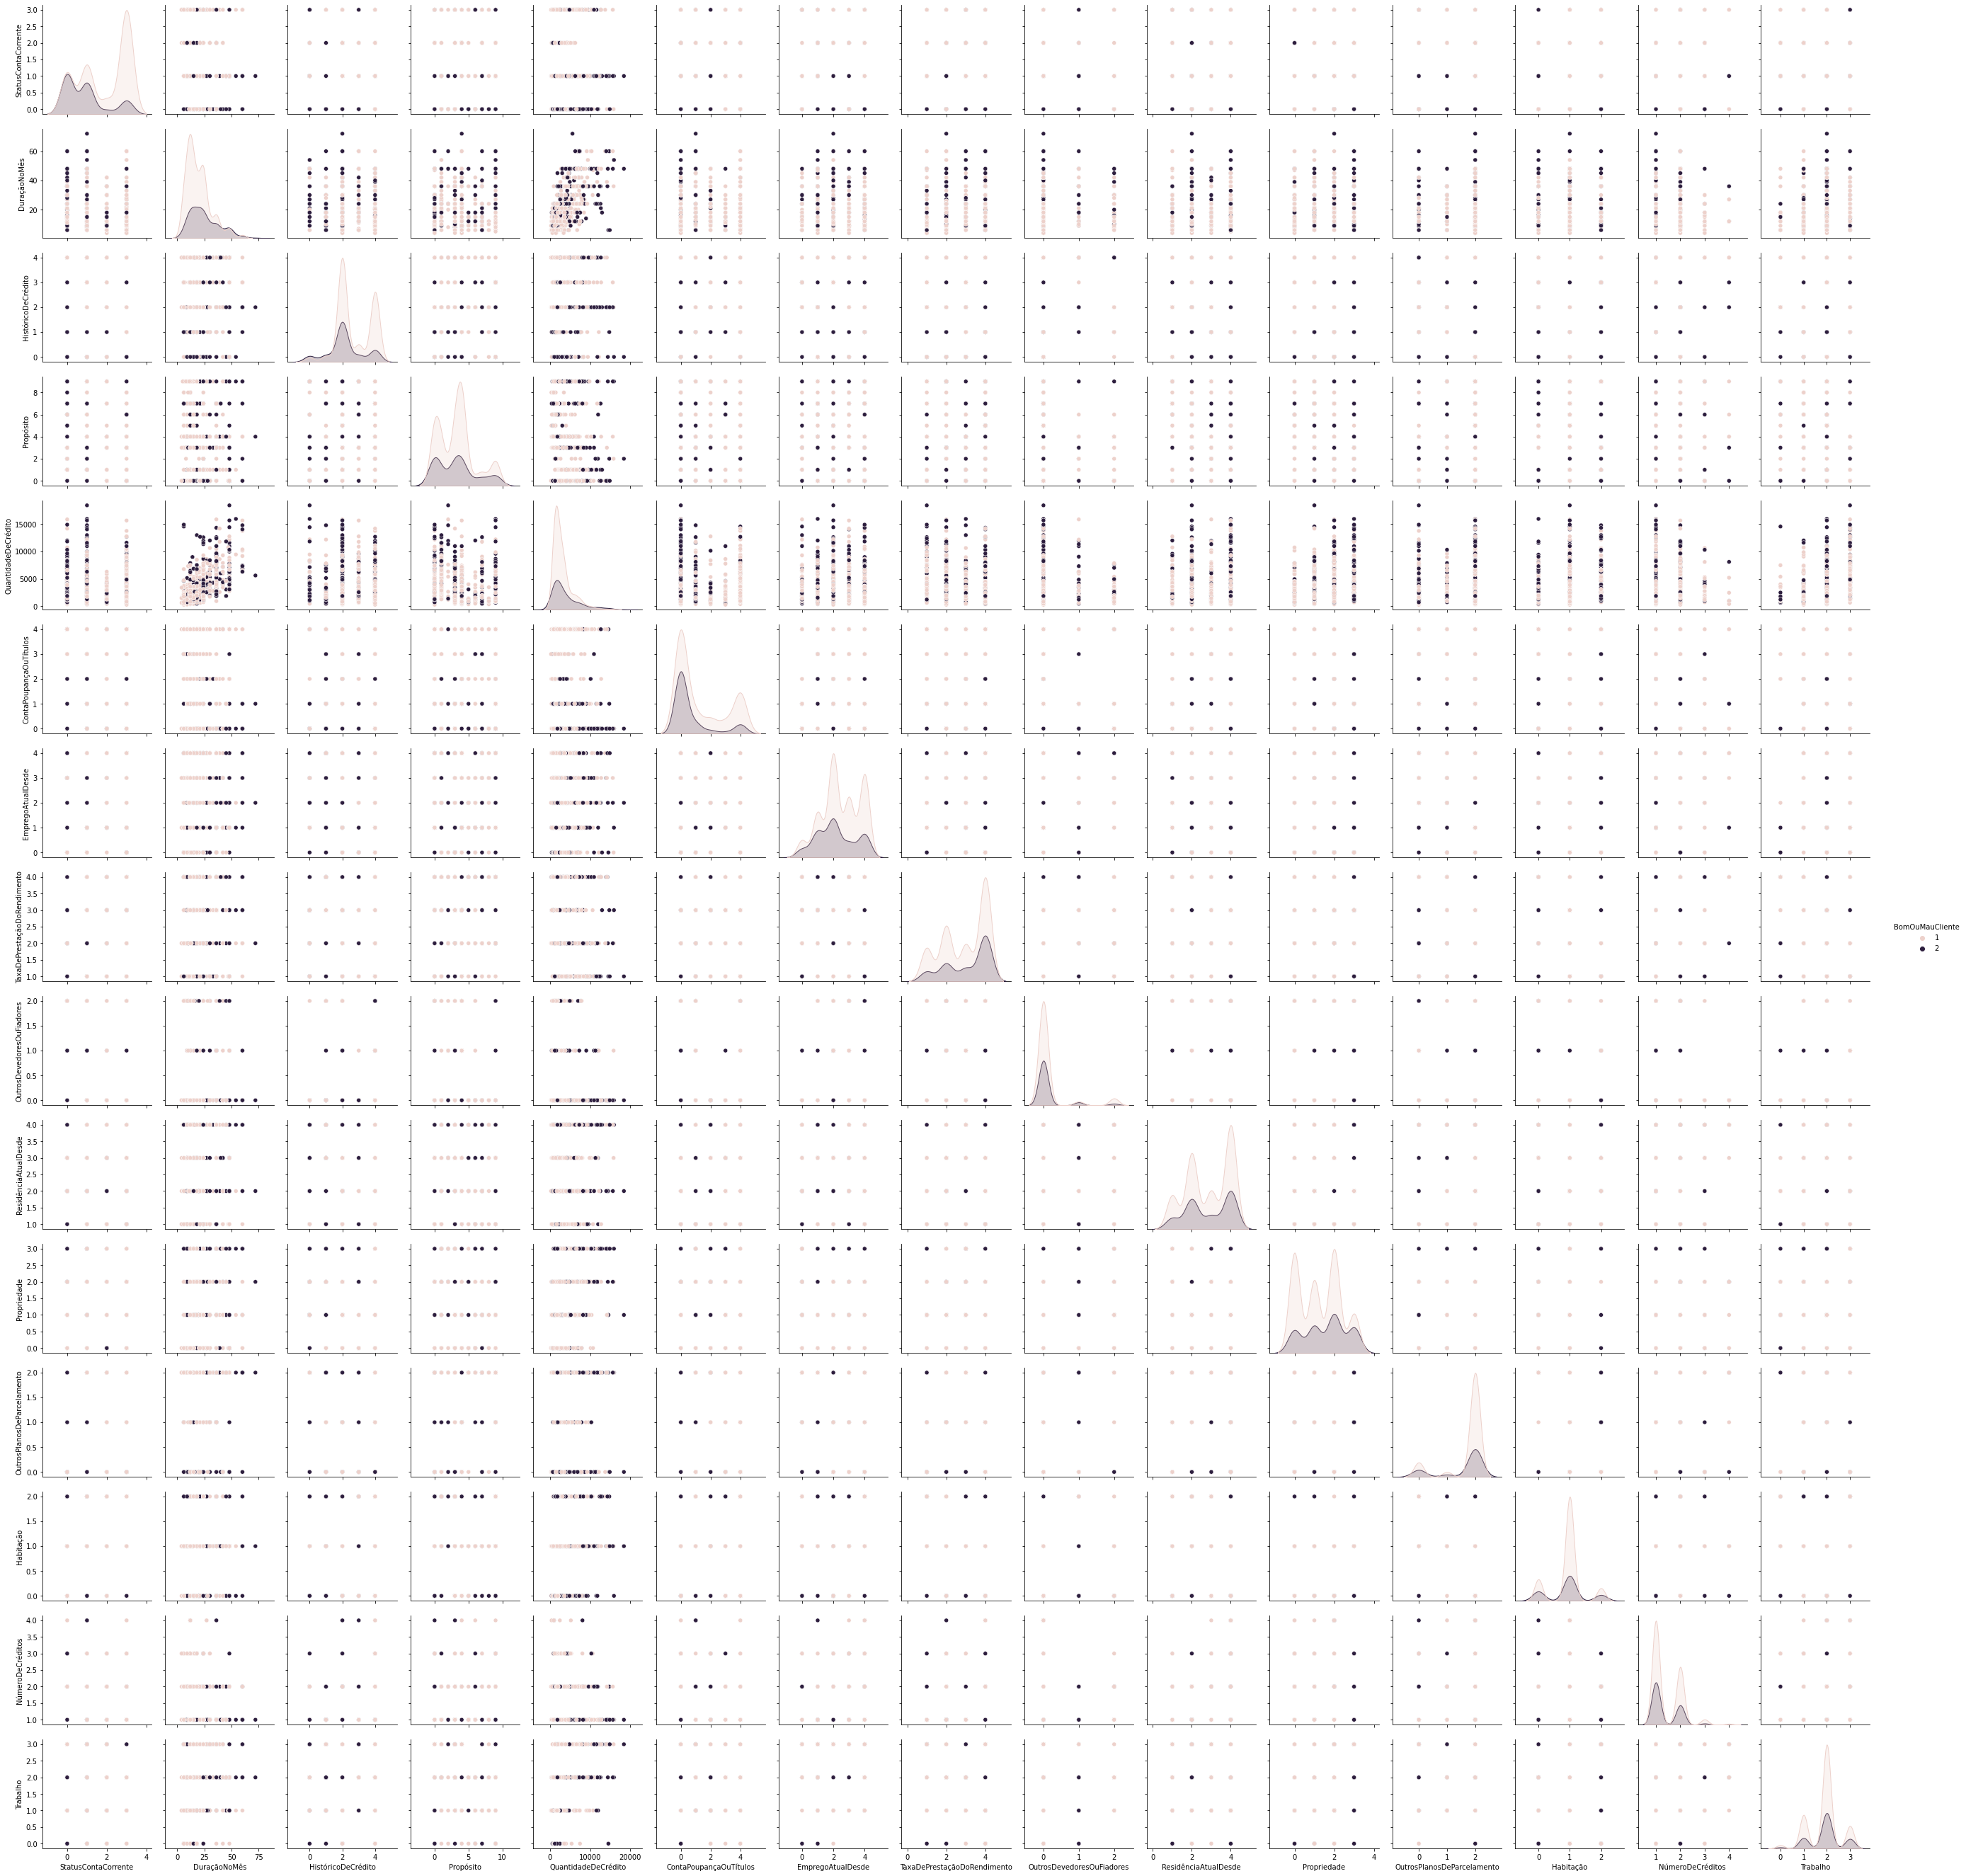

In [9]:
# Impressao da matriz de correlacao dos dados
sns.pairplot(df, hue="BomOuMauCliente")

# Vemos que não há nenhum dado correlacionado
# O mais perto de uma correção é entre a Duração no Mês e a Quantidade de Crédito

# 5.5 One Hot Enconding

In [10]:

# Fazer o One Hot Enconding

df = pd.get_dummies(df, columns=["StatusContaCorrente",
                                 "HistóricoDeCrédito", "Propósito", 
                                 "ContaPoupançaOuTítulos", "EmpregoAtualDesde", 
                                 "OutrosDevedoresOuFiadores", "Propriedade", "OutrosPlanosDeParcelamento",
                                 "Habitação", "Trabalho"])


colunas = df.columns.to_list()
colunas.remove('BomOuMauCliente')
colunas.append('BomOuMauCliente')

df = df[colunas]

# Renomear as Colunas


# Não tem no Banco de Dados
# Não tem Status pessoal e sexo -> feminino Solteiro
# Não tem Propósito -> férias, 

novas_colunas= {'StatusContaCorrente_0':'StatusContaCorrente: x < 0 DM ', 
             'StatusContaCorrente_1': 'StatusContaCorrente: 0 <= x < 200 DM',
             'StatusContaCorrente_2' : 'StatusContaCorrente: x >= 200 DM',
             'StatusContaCorrente_3': 'StatusContaCorrente: Sem Conta Corrente', 
             'HistóricoDeCrédito_0':'HistóricoDeCrédito: Nenhum crédito recebido/todos pagos',
             'HistóricoDeCrédito_1': "HistóricoDeCrédito: Todos os créditos neste banco pagos",         
             'HistóricoDeCrédito_2' : 'HistóricoDeCrédito: Créditos existentes pagos devidamente até agora', 
             'HistóricoDeCrédito_3': "HistóricoDeCrédito: Atraso no pagamento no passado",
              "HistóricoDeCrédito_4": "HistóricoDeCrédito: Conta crítica",
              'Propósito_0': "Propósito: carro (novo)", 
               'Propósito_1': "Propósito: carro (usado)" ,
               'Propósito_2' : "Propósito: Móveis/equipamentos" ,
               'Propósito_3': "Propósito: rádio/televisão",
               'Propósito_4' : "Propósito: eletrodomésticos ",
               'Propósito_5': "Propósito: reparos",
               'Propósito_6': "Propósito: educação", 
               'Propósito_7' : "Propósito: reciclagem", 
               'Propósito_8' :"Propósito: negócios" , 
               'Propósito_9' : "Propósito: outros",
               'ContaPoupançaOuTítulos_0': "ContaPoupançaOuTítulos: x < 100 DM", 
               'ContaPoupançaOuTítulos_1' : "ContaPoupançaOuTítulos: 100 <= x < 500 DM", 
               'ContaPoupançaOuTítulos_2' : "ContaPoupançaOuTítulos: 500 <= x < 1000 DM",
               'ContaPoupançaOuTítulos_3' : "ContaPoupançaOuTítulos: x >= 1000 DM", 
               'ContaPoupançaOuTítulos_4' : "ContaPoupançaOuTítulos: desconhecida",
               'EmpregoAtualDesde_0': 'EmpregoAtualDesde: desempregado ', 
               'EmpregoAtualDesde_1': 'EmpregoAtualDesde: x < 1 ano', 
               'EmpregoAtualDesde_2': 'EmpregoAtualDesde: 1 <= x < 4 anos',
               'EmpregoAtualDesde_3': 'EmpregoAtualDesde: 4 <= x < 7 anos', 
               'EmpregoAtualDesde_4': 'EmpregoAtualDesde: x >= 7 anos',
               'OutrosDevedoresOuFiadores_0' : 'OutrosDevedoresOuFiadores: nenhum ', 
               'OutrosDevedoresOuFiadores_1' : 'OutrosDevedoresOuFiadores: co-requerente', 
               'OutrosDevedoresOuFiadores_2' : 'OutrosDevedoresOuFiadores: fiador', 
               'Propriedade_0': 'Propriedade: imóveis ', 
               'Propriedade_1' : 'Propriedade: convênio de poupança/seguro de vida' ,
               'Propriedade_2' : 'Propriedade: carro ou outro',
               'Propriedade_3' : 'Propriedade: desconhecido ', 
               'OutrosPlanosDeParcelamento_0': "OutrosPlanosDeParcelamento: banco ",
               'OutrosPlanosDeParcelamento_1' : "OutrosPlanosDeParcelamento: lojas ", 
               'OutrosPlanosDeParcelamento_2' : "OutrosPlanosDeParcelamento: nenhum ",
               'Habitação_0' : "Habitação: aluguel", 
               'Habitação_1': "Habitação: próprio", 
               'Habitação_2' : "Habitação: de graça ", 
               'Trabalho_0' : "Trabalho: desempregado/não qualificado/não residente", 
               'Trabalho_1' : "Trabalho: não qualificado/residente", 
               'Trabalho_2': "Trabalho: funcionário/funcionário qualificado ", 
               'Trabalho_3': "Trabalho: gestão/ autônomo/funcionário/diretor altamente qualificado"}
df = df.rename(novas_colunas, axis = 1)

df.head()

,DuraçãoNoMês,QuantidadeDeCrédito,TaxaDePrestaçãoDoRendimento,ResidênciaAtualDesde,NúmeroDeCréditos,StatusContaCorrente: x < 0 DM,StatusContaCorrente: 0 <= x < 200 DM,StatusContaCorrente: x >= 200 DM,StatusContaCorrente: Sem Conta Corrente,HistóricoDeCrédito: Nenhum crédito recebido/todos pagos,...,OutrosPlanosDeParcelamento: lojas,OutrosPlanosDeParcelamento: nenhum,Habitação: aluguel,Habitação: próprio,Habitação: de graça,Trabalho: desempregado/não qualificado/não residente,Trabalho: não qualificado/residente,Trabalho: funcionário/funcionário qualificado,Trabalho: gestão/ autônomo/funcionário/diretor altamente qualificado,BomOuMauCliente
0,6,1169,4,4,2,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1
1,48,5951,2,2,1,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,2
2,12,2096,2,3,1,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1
3,42,7882,2,4,1,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
4,24,4870,3,4,2,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,2


# 5.6 Normalização dos Atributos Numéricos

In [11]:
# Min Max Scaler
aux = df

scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(df.values[:,:-1])
df= pd.DataFrame(X, columns=df.columns[:-1])

df["BomOuMauCliente"] = aux["BomOuMauCliente"]

df.head()





,DuraçãoNoMês,QuantidadeDeCrédito,TaxaDePrestaçãoDoRendimento,ResidênciaAtualDesde,NúmeroDeCréditos,StatusContaCorrente: x < 0 DM,StatusContaCorrente: 0 <= x < 200 DM,StatusContaCorrente: x >= 200 DM,StatusContaCorrente: Sem Conta Corrente,HistóricoDeCrédito: Nenhum crédito recebido/todos pagos,...,OutrosPlanosDeParcelamento: lojas,OutrosPlanosDeParcelamento: nenhum,Habitação: aluguel,Habitação: próprio,Habitação: de graça,Trabalho: desempregado/não qualificado/não residente,Trabalho: não qualificado/residente,Trabalho: funcionário/funcionário qualificado,Trabalho: gestão/ autônomo/funcionário/diretor altamente qualificado,BomOuMauCliente
0,0.029412,0.050567,1.000000,1.000000,0.333333,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
1,0.647059,0.313690,0.333333,0.333333,0.000000,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
2,0.117647,0.101574,0.333333,0.666667,0.000000,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
3,0.558824,0.419941,0.333333,1.000000,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
4,0.294118,0.254209,0.666667,1.000000,0.333333,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2


# Etapa 6 Verificar Distribuição dos dados com base no Rótulo (Cliente Bom ou Ruim)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

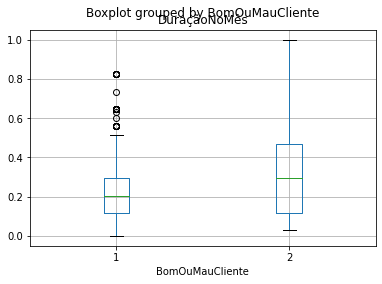

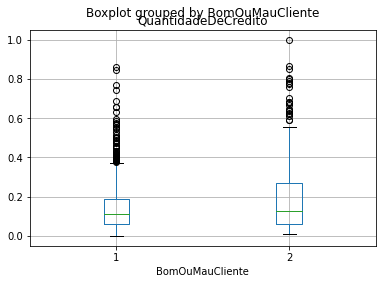

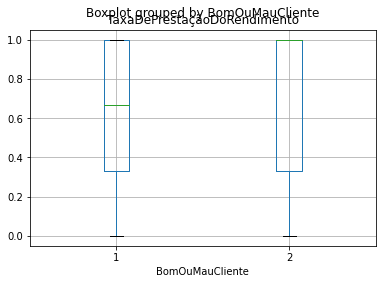

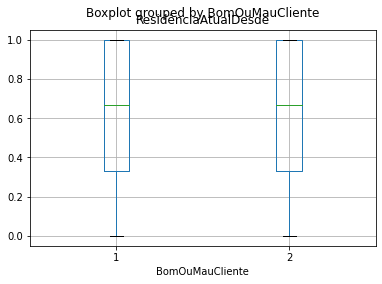

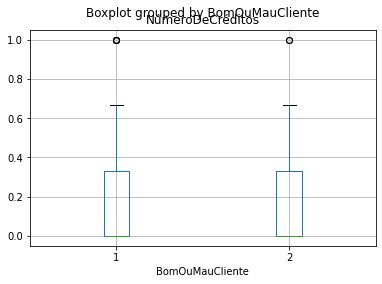

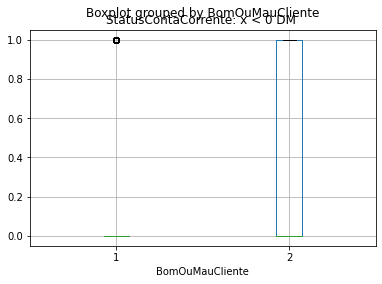

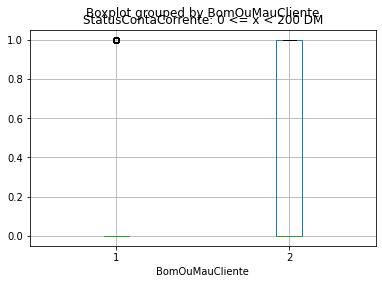

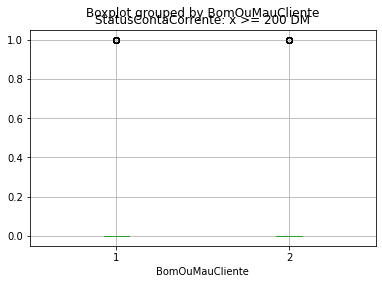

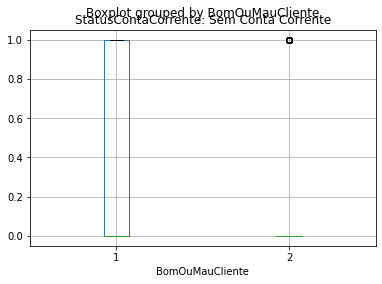

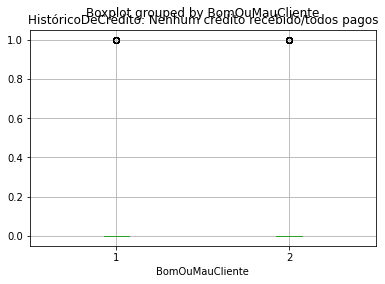

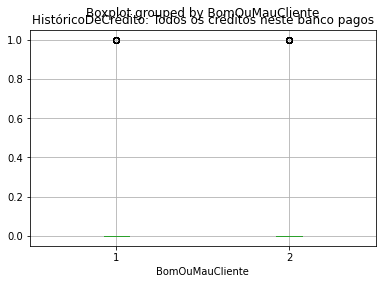

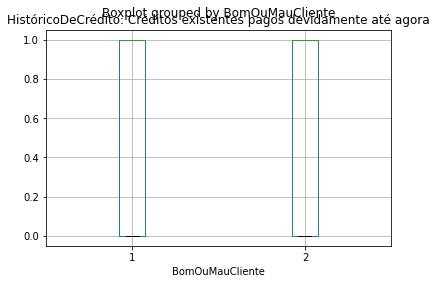

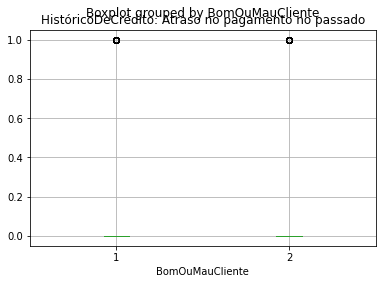

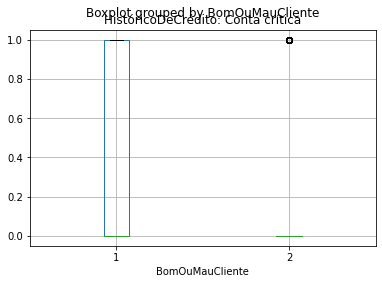

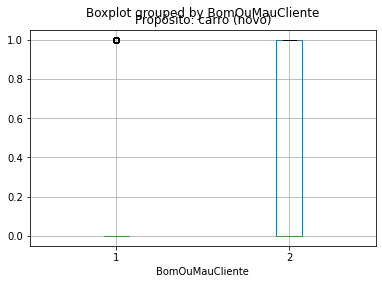

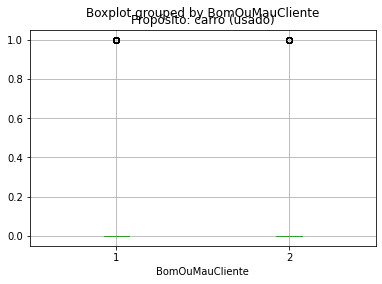

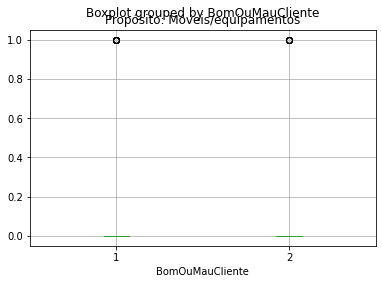

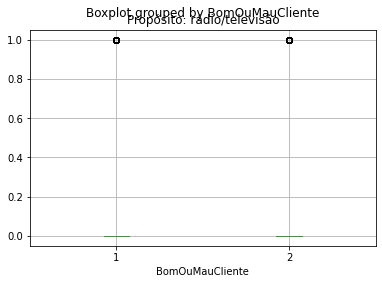

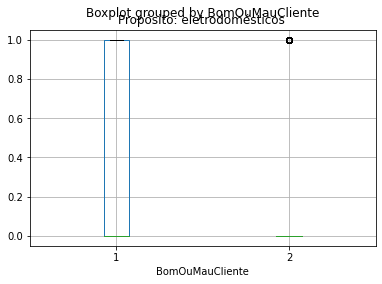

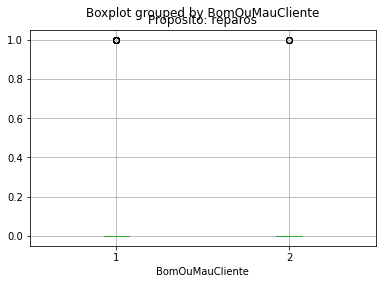

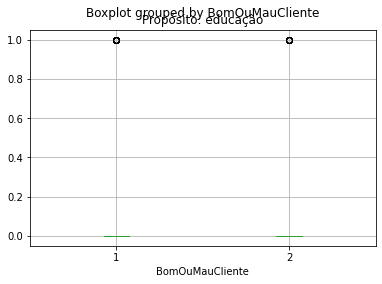

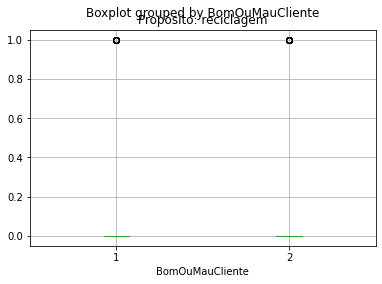

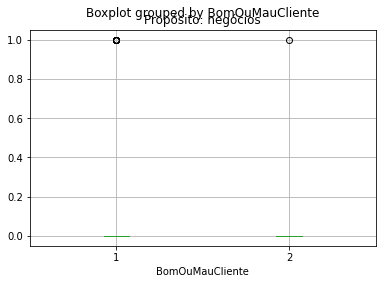

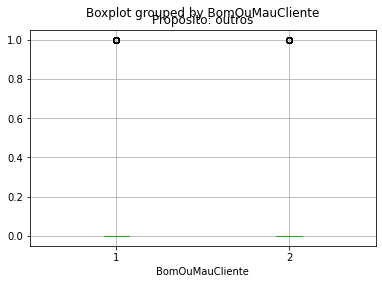

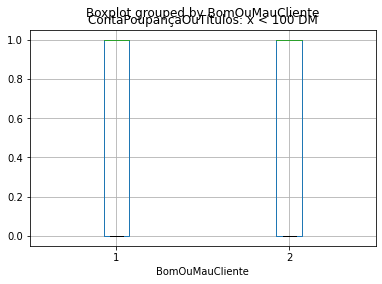

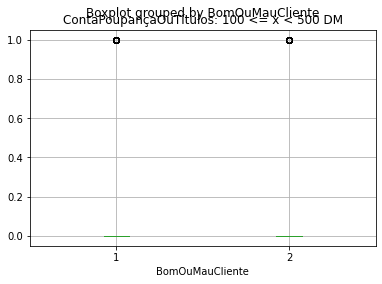

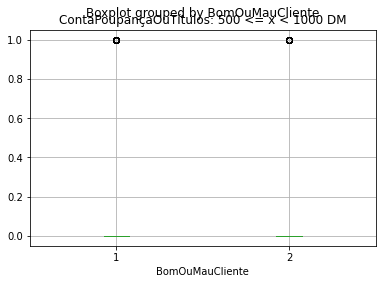

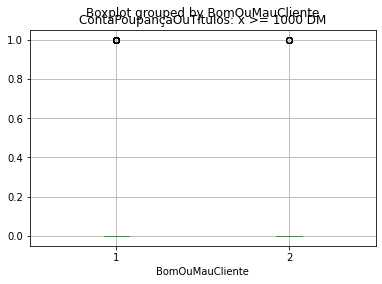

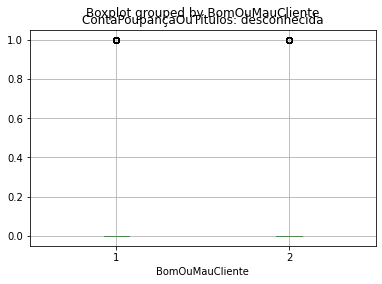

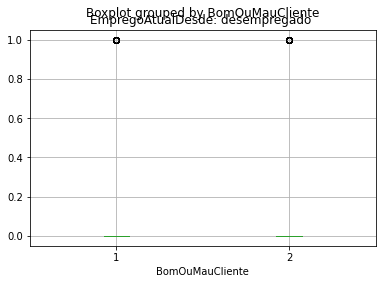

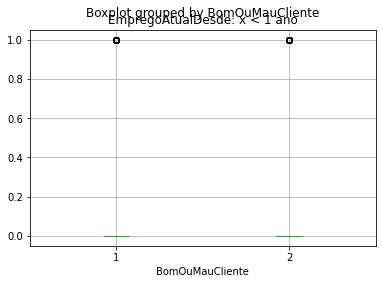

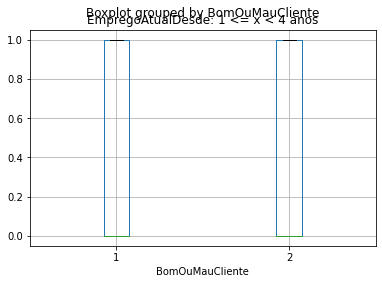

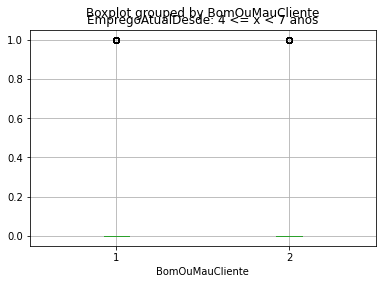

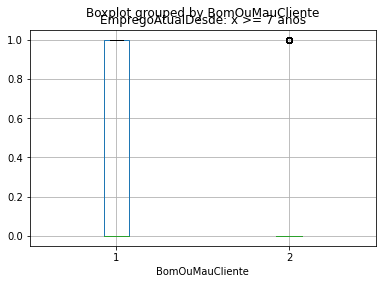

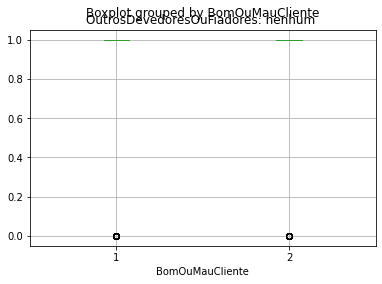

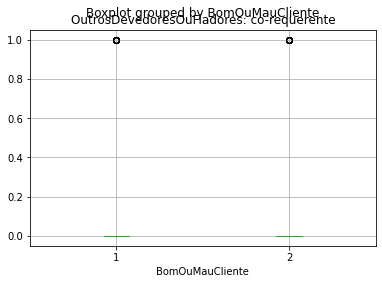

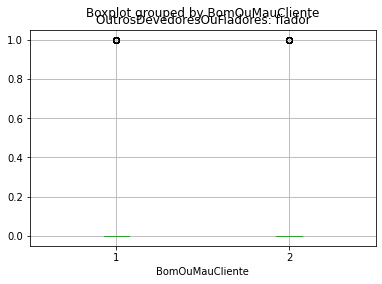

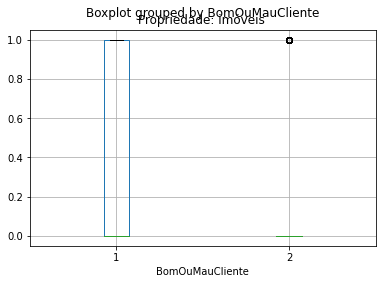

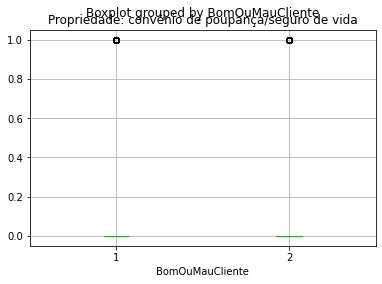

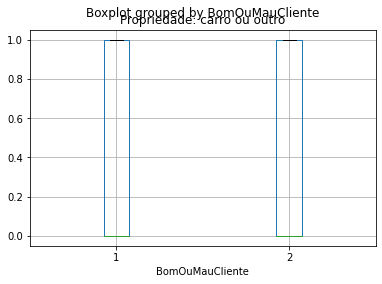

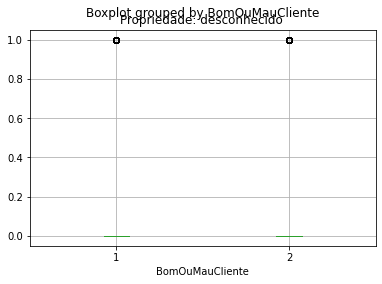

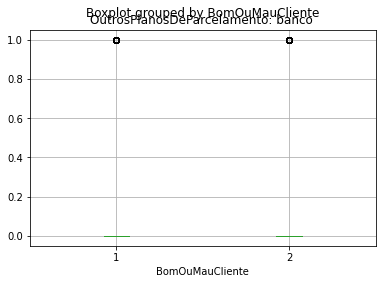

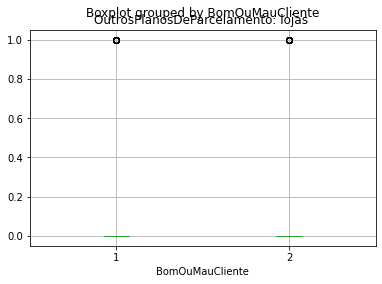

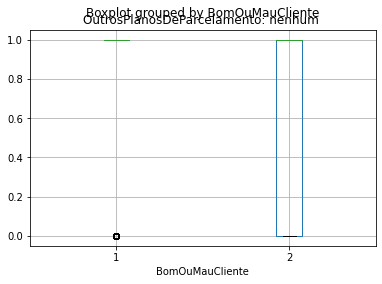

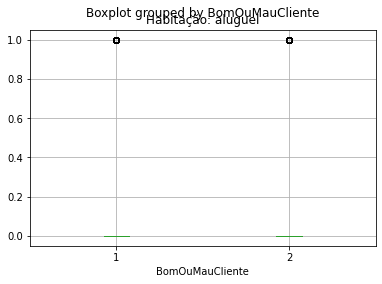

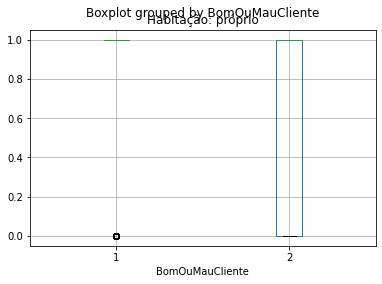

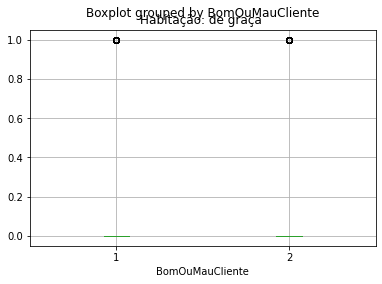

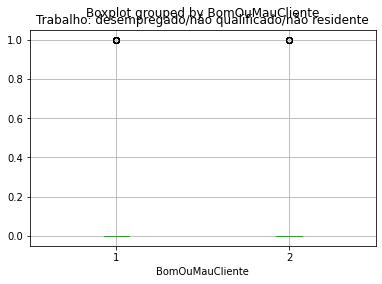

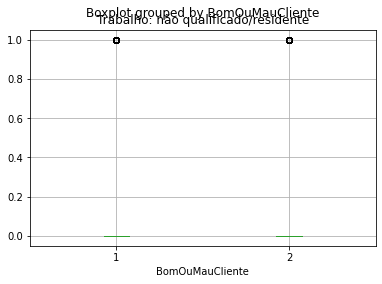

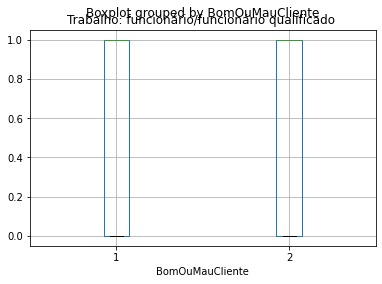

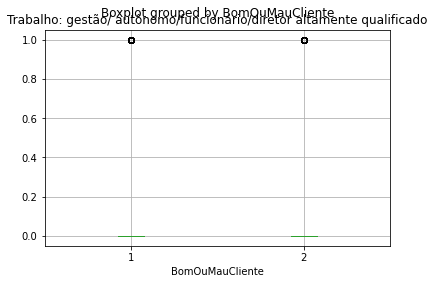

In [12]:
colunas = df.columns.to_list()

for coluna in colunas:
  if coluna != 'BomOuMauCliente':

    df.boxplot(by='BomOuMauCliente', column = coluna)

# Analisando os dados é possível perceber que:
# StatusContaCorrente x < 0 DM -> Tende para 2 (Cliente Ruim)
# StatusContaCorrente 0 <= x <= 200 DM -> Tende para 2 (Cliente Ruim)
# StatusContaCorrente: Sem Conta Corrente -> Tende para 1 (Cliente Bom)
# Hitórico de Crédito Conta Crítica  -> Tende para 1 (Cliente Bom) -> Estranho
# Propósito : Carro(Novo) -> Tende para 2 (Cliente Ruim) -> Estranho
# Propósito: Eletrodomésticos -> Tende para 1 (Cliente Bom)
# Emprego Atual Desde: x >= 7 anos -> Tende para 1 (Cliente Bom)
# Propriedade: Imóveis -> Tende para 1 (Cliente Bom)
# Outros Planos de Parcelamento: nenhum -> Tende para 2 (Cliente Ruim)
# Habitação: Própria  -> Tende para 2 (Cliente Ruim) -> Estranho 


In [13]:
# Remover alguns atributos
# StatusContaCorrente: x >= 200 DM
# HistóricoDeCrédito: Nenhum crédito recebido/todos pagos
# Propósito Eletrodoméstico???
# etc

df.drop(['HistóricoDeCrédito: Conta crítica', 'Propósito: carro (novo)', 'Habitação: próprio'], axis=1, inplace=True)
df.head()



# Remover alguns atributos
# StatusContaCorrente: x >= 200 DM
# 'Propósito: carro (novo)'
# 'Habitação: próprio'
# Propósito Eletrodoméstico???
# etc
#print(df.columns.to_list())



#df.drop(["StatusContaCorrente: x >= 200 DM", 'HistóricoDeCrédito: Atraso no pagamento no passado', "HistóricoDeCrédito: Atraso no pagamento no passado", 'HistóricoDeCrédito: Conta crítica', 'Propósito: carro (novo)', 'Propósito: carro (usado)', 'Propósito: Móveis/equipamentos', 'Propósito: rádio/televisão', 'Propósito: reparos', 'Propósito: educação', 'Propósito: reciclagem', 'Propósito: negócios', 'Propósito: outros', 'ContaPoupançaOuTítulos: 100 <= x < 500 DM',  'ContaPoupançaOuTítulos: 500 <= x < 1000 DM',  'ContaPoupançaOuTítulos: x >= 1000 DM', 'ContaPoupançaOuTítulos: desconhecida', 'EmpregoAtualDesde: desempregado ', 'EmpregoAtualDesde: x < 1 ano','EmpregoAtualDesde: 4 <= x < 7 anos', 'OutrosDevedoresOuFiadores: nenhum ', 'OutrosDevedoresOuFiadores: co-requerente', 'OutrosDevedoresOuFiadores: fiador', 'Propriedade: convênio de poupança/seguro de vida', 'Propriedade: desconhecido ', 'OutrosPlanosDeParcelamento: banco ', 'OutrosPlanosDeParcelamento: lojas ',  'Habitação: aluguel', 'Habitação: próprio', 'Habitação: de graça ', 'Trabalho: desempregado/não qualificado/não residente', 'Trabalho: não qualificado/residente', 'Trabalho: gestão/ autônomo/funcionário/diretor altamente qualificado', "Propósito: eletrodomésticos " ], axis=1, inplace=True)


,DuraçãoNoMês,QuantidadeDeCrédito,TaxaDePrestaçãoDoRendimento,ResidênciaAtualDesde,NúmeroDeCréditos,StatusContaCorrente: x < 0 DM,StatusContaCorrente: 0 <= x < 200 DM,StatusContaCorrente: x >= 200 DM,StatusContaCorrente: Sem Conta Corrente,HistóricoDeCrédito: Nenhum crédito recebido/todos pagos,...,OutrosPlanosDeParcelamento: banco,OutrosPlanosDeParcelamento: lojas,OutrosPlanosDeParcelamento: nenhum,Habitação: aluguel,Habitação: de graça,Trabalho: desempregado/não qualificado/não residente,Trabalho: não qualificado/residente,Trabalho: funcionário/funcionário qualificado,Trabalho: gestão/ autônomo/funcionário/diretor altamente qualificado,BomOuMauCliente
0,0.029412,0.050567,1.000000,1.000000,0.333333,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,0.647059,0.313690,0.333333,0.333333,0.000000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2
2,0.117647,0.101574,0.333333,0.666667,0.000000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,0.558824,0.419941,0.333333,1.000000,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
4,0.294118,0.254209,0.666667,1.000000,0.333333,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2


# Etapa 7 Divisão do Conjunto de Treinamento Treino e Teste

In [45]:
X = df.values[:,:-1] # Conjuntos de atributos
y = df.values[:,-1] # Rotulo do meu conjunto de dados

Xtrain, XTest, yTrain, yTest = train_test_split(X,y,test_size= 0.3) # 30% para teste

# Etapa 8 Treinamento do Modelos

In [46]:
modelo_regressao_logistica = LogisticRegression(C=0.2, tol=2, intercept_scaling=0.1, class_weight={1:49.9, 2:50.1}) # class_weight={1:48, 2:52}
modelo_regressao_logistica.fit(Xtrain, yTrain)

# O número mínimo de amostras necessárias para estar em um nó folha = 30
modelo_arvore_de_decisao = DecisionTreeClassifier(min_samples_split=30)
modelo_arvore_de_decisao.fit(Xtrain, yTrain)

# Número de Árvores de Decisão = 150
modelo_random_forest = RandomForestClassifier(n_estimators=150)
modelo_random_forest.fit(Xtrain, yTrain)

RandomForestClassifier(n_estimators=150)

# Etapa 9 Validação Cruzada (Acurácia e F-measure)

In [35]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores_regressao_logistica_accuracy = cross_val_score(modelo_regressao_logistica, Xtrain, yTrain, scoring='accuracy', cv=cv)
scores_regressao_logistica_fmeasure = cross_val_score(modelo_regressao_logistica, Xtrain, yTrain, scoring="f1", cv=cv)

scores_arvore_de_decisao_accuracy = cross_val_score(modelo_arvore_de_decisao, Xtrain, yTrain, scoring='accuracy', cv=cv)
scores_arvore_de_decisao_fmeasure = cross_val_score(modelo_arvore_de_decisao, Xtrain, yTrain, scoring="f1", cv=cv)


scores_random_forest_accuracy = cross_val_score(modelo_random_forest, Xtrain, yTrain, scoring='accuracy', cv=cv)
scores_random_forest_fmeasure = cross_val_score(modelo_random_forest, Xtrain, yTrain, scoring="f1", cv=cv)


In [36]:
# Regressão Logística
print("Regressão Logística")
print('Acurácia Regressão Logística: %.3f (%.3f)' % (np.mean(scores_regressao_logistica_accuracy), np.std(scores_regressao_logistica_accuracy)))
print('F-Measure Regressão Logística: %.3f (%.3f)' % (np.mean(scores_regressao_logistica_fmeasure), np.std(scores_regressao_logistica_fmeasure)))
print()

# Árvore de Decisão
print("Árvore de Decisão")
print('Acurácia Árvore de Decisão: %.3f (%.3f)' % (np.mean(scores_arvore_de_decisao_accuracy), np.std(scores_arvore_de_decisao_accuracy)))
print('F-Measure Árvore de Decisão: %.3f (%.3f)' % (np.mean(scores_arvore_de_decisao_fmeasure ), np.std(scores_arvore_de_decisao_fmeasure )))
print()

# Random Forest
print("Random Forest")
print('Acurácia Random Forest: %.3f (%.3f)' % (np.mean(scores_random_forest_accuracy), np.std(scores_random_forest_accuracy)))
print('F-Measure Random Forest: %.3f (%.3f)' % (np.mean(scores_random_forest_fmeasure), np.std(scores_random_forest_fmeasure)))
print()

# É possível notar que a Random Forest tem um melhor resultado
# Depois a Regressão Logística
# E por último a Árvore de Decisão

Regressão Logística
Acurácia Regressão Logística: 0.747 (0.041)
F-Measure Regressão Logística: 0.824 (0.030)

Árvore de Decisão
Acurácia Árvore de Decisão: 0.726 (0.057)
F-Measure Árvore de Decisão: 0.807 (0.044)

Random Forest
Acurácia Random Forest: 0.773 (0.034)
F-Measure Random Forest: 0.841 (0.036)



# Etapa 10 Predição no Conjunto de Teste

In [41]:
predicao_regresao_logistica = modelo_regressao_logistica.predict(XTest)
predicao_arvore_de_decisao = modelo_arvore_de_decisao.predict(XTest)
predicao_random_forest = modelo_random_forest.predict(XTest)

# valor real -> yTest

# Etapa 11 Matriz de Confusão

In [42]:
def plotar_matriz_de_confusao(matriz_de_confusao, predicao):
  ax = sns.heatmap(matriz_de_confusao, annot=True, cmap='Blues')

  ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['Bom','Ruim'])
  ax.yaxis.set_ticklabels(['Bom','Ruim'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

Matriz de Confusão Regressão Logística


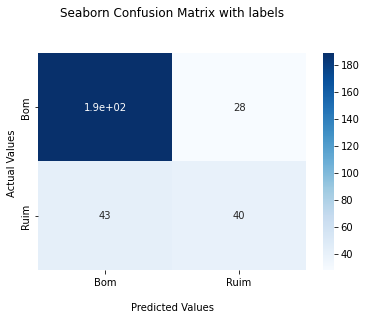

Matriz de Confusão Árvore de Decisão


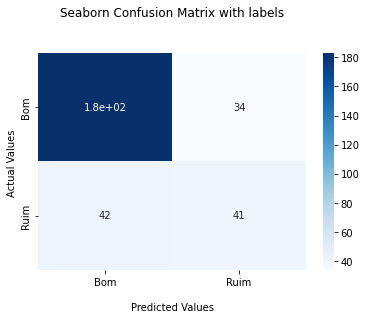

Matriz de Confusão Random Forest


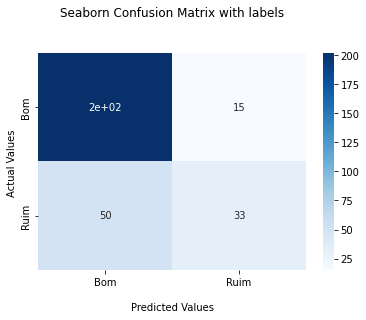

In [43]:
# Regressão Logística
print("Matriz de Confusão Regressão Logística")

matriz_confusao_regressao_logistica = confusion_matrix(y_true = list(yTest), y_pred = list(predicao_regresao_logistica), labels=[1,2])
plotar_matriz_de_confusao(matriz_confusao_regressao_logistica, predicao_regresao_logistica)


# Árvore de Decisão
print("Matriz de Confusão Árvore de Decisão")
matriz_confusao_arvore_de_decisao = confusion_matrix(yTest, predicao_arvore_de_decisao, labels=[1,2])
plotar_matriz_de_confusao(matriz_confusao_arvore_de_decisao, predicao_arvore_de_decisao)

# Random Forest
print("Matriz de Confusão Random Forest")
matriz_confusao_random_forest = confusion_matrix(yTest, predicao_random_forest, labels=[1,2])
plotar_matriz_de_confusao(matriz_confusao_random_forest, predicao_random_forest)





In [44]:
# Análise da Matriz de Confusão
print("Regressão Logística")
print("Acertos em Bom:", round(matriz_confusao_regressao_logistica[0][0] /(matriz_confusao_regressao_logistica[0][0] + matriz_confusao_regressao_logistica[0][1]),3))
print("Acertos em Ruim:", round(matriz_confusao_regressao_logistica[1][1] /(matriz_confusao_regressao_logistica[1][0] + matriz_confusao_regressao_logistica[1][1]),3))
print()

print("Árvore de Decisão")
print("Acertos em Bom:", round(matriz_confusao_arvore_de_decisao[0][0] /(matriz_confusao_arvore_de_decisao[0][0] + matriz_confusao_arvore_de_decisao[0][1]),3))
print("Acertos em Ruim:", round(matriz_confusao_arvore_de_decisao[1][1] /(matriz_confusao_arvore_de_decisao[1][0] + matriz_confusao_arvore_de_decisao[1][1]),3))
print()


print("Random Forest")
print("Acertos em Bom:", round(matriz_confusao_random_forest[0][0] /(matriz_confusao_random_forest[0][0] + matriz_confusao_random_forest[0][1]),3))
print("Acertos em Ruim:", round(matriz_confusao_random_forest[1][1] /(matriz_confusao_random_forest[1][0] + matriz_confusao_random_forest[1][1]),3))
print()

#No conjunto de teste é possível perceber 
# Que a Random Forest tem um melhor resultado em acertar Clientes bons
# E a Regressão Logística acerta mais os Clientes Ruins




Regressão Logística
Acertos em Bom: 0.871
Acertos em Ruim: 0.482

Árvore de Decisão
Acertos em Bom: 0.843
Acertos em Ruim: 0.494

Random Forest
Acertos em Bom: 0.931
Acertos em Ruim: 0.398

